In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [0]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 83s 4ms/step - loss: 0.5238 - acc: 0.7520 - val_loss: 0.3868 - val_acc: 0.8572
Epoch 2/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.3021 - acc: 0.8820 - val_loss: 0.4007 - val_acc: 0.8606
Epoch 3/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.2413 - acc: 0.9075 - val_loss: 0.2963 - val_acc: 0.8898
Epoch 4/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.2087 - acc: 0.9221 - val_loss: 0.3001 - val_acc: 0.8732
Epoch 5/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.1818 - acc: 0.9353 - val_loss: 0.3970 - val_acc: 0.8456
Epoch 6/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.1637 - acc: 0.9414 - val_loss: 0.4461 - val_acc: 0.8570
Epoch 7/10
20000/20000 [========

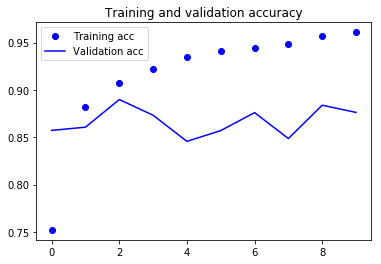

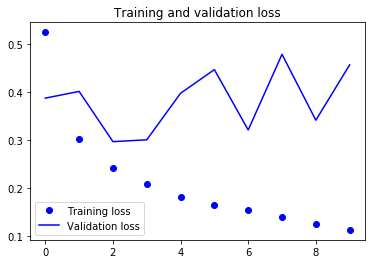

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()